In [3]:
import pandas as pd
df = pd.read_csv('data/spam.csv',  encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
#레이불 넣기

df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#label encodding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep = 'first', inplace=True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
print(f'정상 메일의 비율 = {round(df["target"].value_counts()[0]/len(df) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(df["target"].value_counts()[1]/len(df) * 100,3)}%')

정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


In [16]:
#중복확인
df.duplicated().sum()

0

In [17]:
X_data = df['text']
y_data = df['target']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/coldbrew/miniconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.

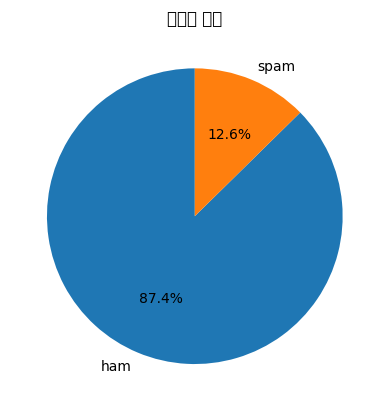

In [18]:
import matplotlib.pyplot as plt
#데이터 시각화
plt.pie(df['target'].value_counts(),
        labels=['ham', 'spam'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('데이터 분포')
plt.show()

In [19]:
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/coldbrew/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coldbrew/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
#글자수 확인
df['num_chars'] = df['text'].apply(len)
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#단어수 확인
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
#문장 수

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
# 햄 메시지 확인
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# 스팸 메시지 확인
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences' ]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


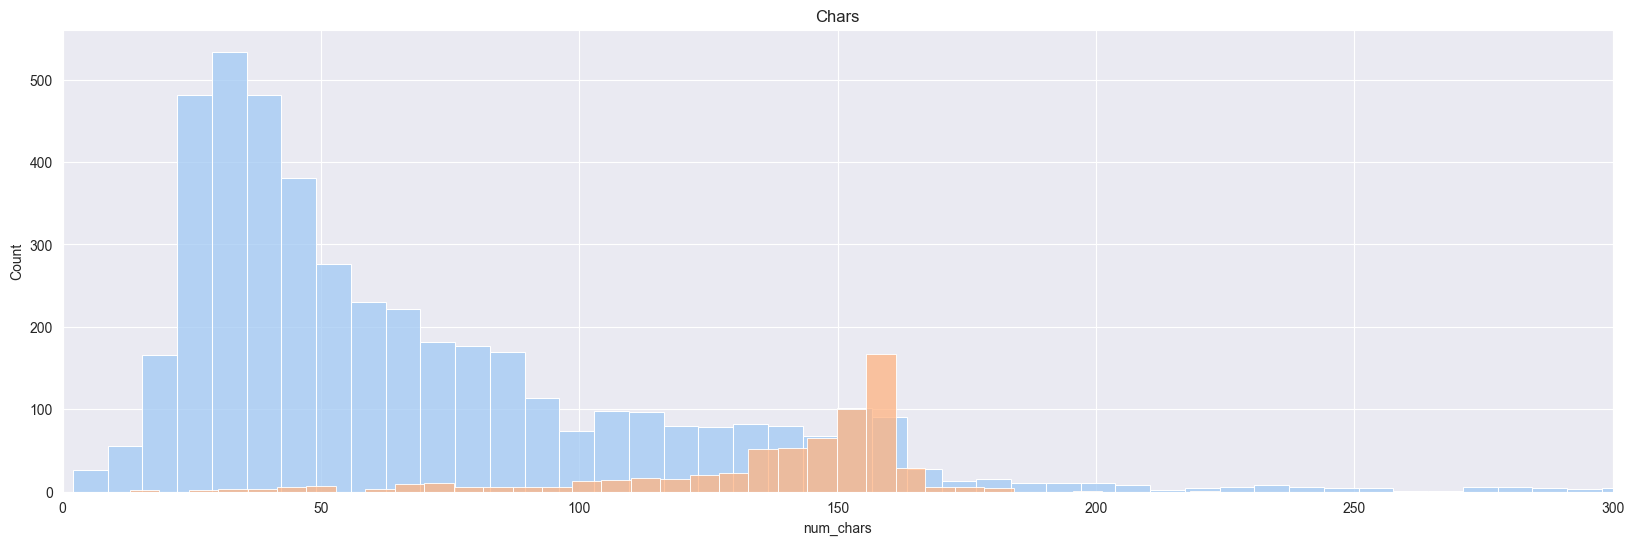

In [30]:
# 글자 데이터 시각화
import seaborn as sns

sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'])
plt.xlim(0, 300)
plt.title('Chars')
plt.show()

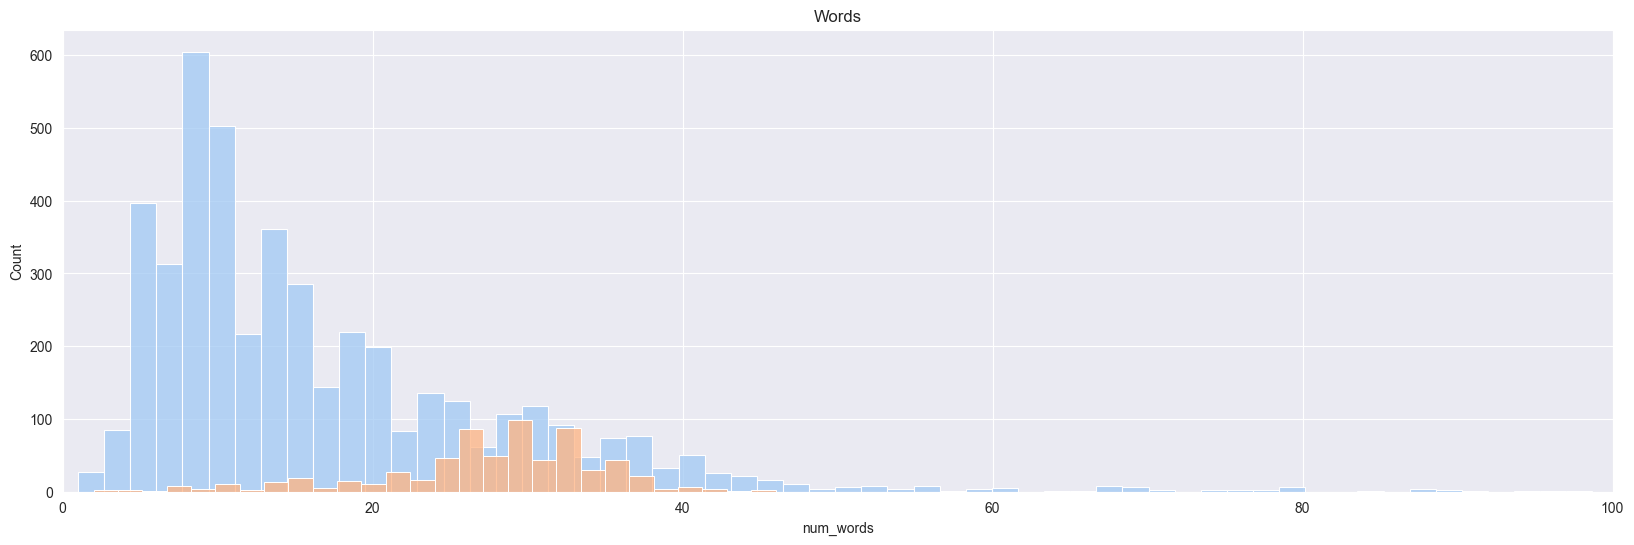

In [33]:
# 단어 데이터 시각화
sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])
plt.xlim(0, 100)
plt.title('Words')
plt.show()

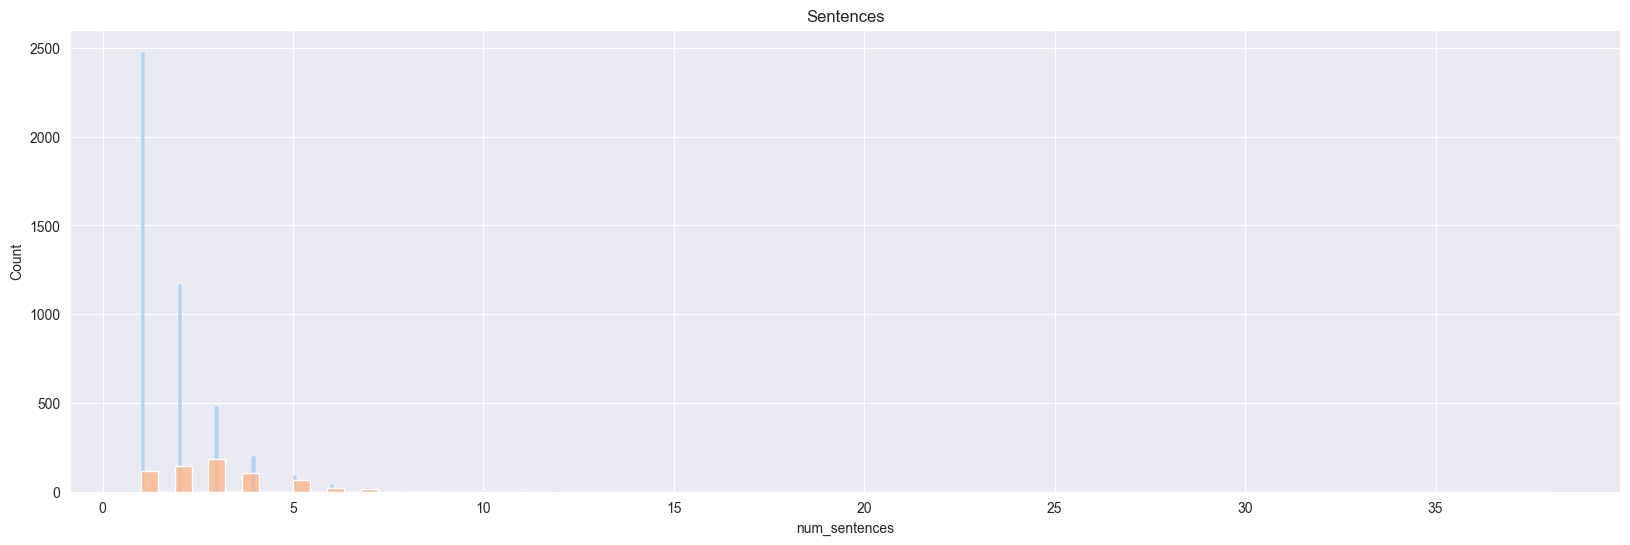

In [34]:
#문장 시각화

sns.set_palette('pastel')
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'])
plt.title('Sentences')
plt.show()

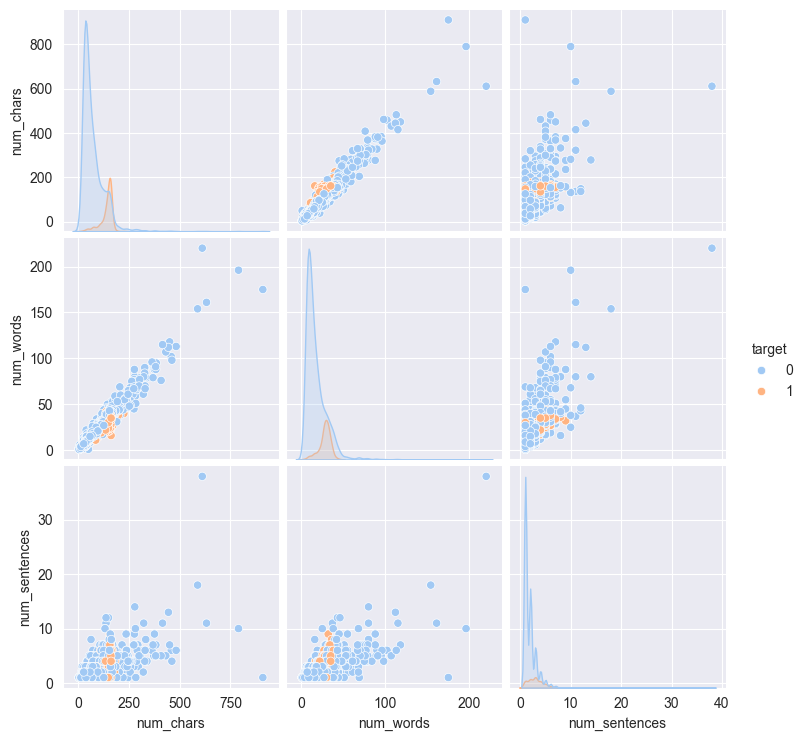

In [35]:
sns.set_palette('pastel')
sns.set_style('darkgrid')
sns.pairplot(df, hue='target')
plt.show()

In [36]:
import numpy as np
# chars, words, sentences 상관관계
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

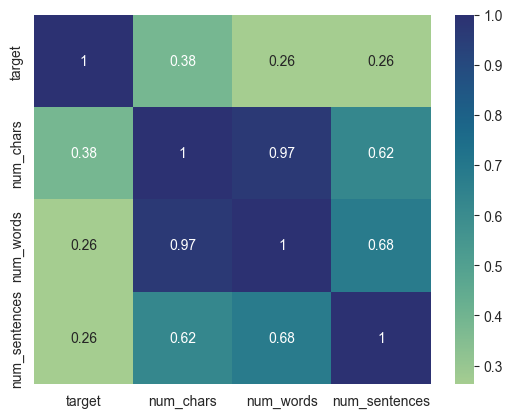

In [37]:
#히트맴으로 분포 보기
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')

In [38]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [39]:
# 보고자 하는 것만 보게해줌
#불용어 처리
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [40]:
transform_text('I am learning Python and I am learning Machine Learning')

'learn python learn machin learn'

In [42]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text']:
    for word in message.split():
        spam_corpus.append(word)

len(spam_corpus)

#스팸에 존재하는 단어의 빈도수

9939

In [46]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text']:
    for word in message.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

etc = ExtraTreeClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [48]:
classifiers = {
    'Extra Tree Classifier': etc,
    'Support Vector Classifier': svc,
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb,
    'Gaussian Naive Bayes': gnb,
    'Bernoulli Naive Bayes': bnb
}

In [49]:
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words

cv = CountVectorizer()
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
X = cv.fit_transform(df['transformed_text'],
                     df['num_chars']).toarray()
y = df['target'].values

X.shape, y.shape

((5169, 6708), (5169,))

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

In [54]:
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    precision_scores = []
    accuracy_scores = []

    for name, model in classifiers.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        precision_scores.append(precision)
        accuracy_scores.append(accuracy)

    performance_df = pd.DataFrame({
        'Model': list(classifiers.keys()),
        'Accuracy': accuracy_scores,
        'Precision': precision_scores
        }).sort_values(by='Precision', ascending=False)
    return performance_df

In [55]:
performance_cv = evaluate_vectorizer(X_train, X_test,
                                     y_train, y_test,
                                     classifiers)
print(performance_cv)

                       Model  Accuracy  Precision
2     K Neighbors Classifier  0.906190   1.000000
3   Random Forest Classifier  0.971954   1.000000
7      Bernoulli Naive Bayes  0.970019   0.973451
4   Decision Tree Classifier  0.923598   0.915493
5    Multinomial Naive Bayes  0.964217   0.834437
0      Extra Tree Classifier  0.941006   0.818182
1  Support Vector Classifier  0.926499   0.742188
6       Gaussian Naive Bayes  0.880077   0.531532


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() # default

In [57]:
X1 = tfidf.fit_transform(df['transformed_text'], df['num_chars']).toarray()
y1 = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    test_size=0.2,
                                                    random_state=2)

In [58]:
performance_tfidf = evaluate_vectorizer(X_train, X_test,
                                        y_train, y_test,
                                        classifiers)
performance_tfidf

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.900387,1.000000
3,Random Forest Classifier,0.971954,1.000000
5,Multinomial Naive Bayes,0.959381,1.000000
1,Support Vector Classifier,0.972921,0.974138
7,Bernoulli Naive Bayes,0.970019,0.973451
0,Extra Tree Classifier,0.948743,0.863248
4,Decision Tree Classifier,0.938104,0.862745
6,Gaussian Naive Bayes,0.876209,0.523148


In [59]:
tfidf1 = TfidfVectorizer(max_features=3000) # max_features = 3000

X2 = tfidf1.fit_transform(df['transformed_text'],
                          df['num_chars']).toarray()
y2 = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                    test_size=0.2,
                                                    random_state=2)

In [60]:
performance_tfidf_3000 = evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
performance_tfidf_3000

,Model,Accuracy,Precision
2,K Neighbors Classifier,0.905222,1.000000
5,Multinomial Naive Bayes,0.970986,1.000000
7,Bernoulli Naive Bayes,0.983559,0.991870
3,Random Forest Classifier,0.975822,0.982906
1,Support Vector Classifier,0.975822,0.974790
0,Extra Tree Classifier,0.951644,0.860656
4,Decision Tree Classifier,0.929400,0.828283
6,Gaussian Naive Bayes,0.869439,0.506849


In [61]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [63]:
# Scaling the data
X3 = tfidf1.fit_transform(df['transformed_text'],
                          df['num_chars']).toarray()
X3 = scaler.fit_transform(X3)

y3 = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X3, y3,
                                                    test_size=0.2,
                                                    random_state=2)

In [64]:
performance_scaled = evaluate_vectorizer(X_train, X_test,
                                         y_train, y_test,
                                         classifiers)
performance_scaled

,Model,Accuracy,Precision
7,Bernoulli Naive Bayes,0.983559,0.991870
3,Random Forest Classifier,0.975822,0.982906
2,K Neighbors Classifier,0.905222,0.976190
5,Multinomial Naive Bayes,0.978723,0.946154
1,Support Vector Classifier,0.969052,0.927419
0,Extra Tree Classifier,0.945841,0.847458
4,Decision Tree Classifier,0.927466,0.811881
6,Gaussian Naive Bayes,0.872340,0.512821


In [65]:
performance_temp = pd.merge(
    performance_cv,
    performance_tfidf,
    on='Model',
    how='inner',
    suffixes=('_cv', '_default')
)

performance_temp2 = pd.merge(
    performance_temp,
    performance_tfidf_3000,
    on='Model',
    how='inner'
)

performance = pd.merge(
    performance_temp2,
    performance_scaled,
    on='Model',
    how='inner',
    suffixes=('_3000', '_scaled')
)

performance

,Model,Accuracy_cv,Precision_cv,Accuracy_default,Precision_default,Accuracy_3000,Precision_3000,Accuracy_scaled,Precision_scaled
0,K Neighbors Classifier,0.906190,1.000000,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,Random Forest Classifier,0.971954,1.000000,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
2,Bernoulli Naive Bayes,0.970019,0.973451,0.970019,0.973451,0.983559,0.991870,0.983559,0.991870
3,Decision Tree Classifier,0.923598,0.915493,0.938104,0.862745,0.929400,0.828283,0.927466,0.811881
4,Multinomial Naive Bayes,0.964217,0.834437,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
5,Extra Tree Classifier,0.941006,0.818182,0.948743,0.863248,0.951644,0.860656,0.945841,0.847458
6,Support Vector Classifier,0.926499,0.742188,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
7,Gaussian Naive Bayes,0.880077,0.531532,0.876209,0.523148,0.869439,0.506849,0.872340,0.512821


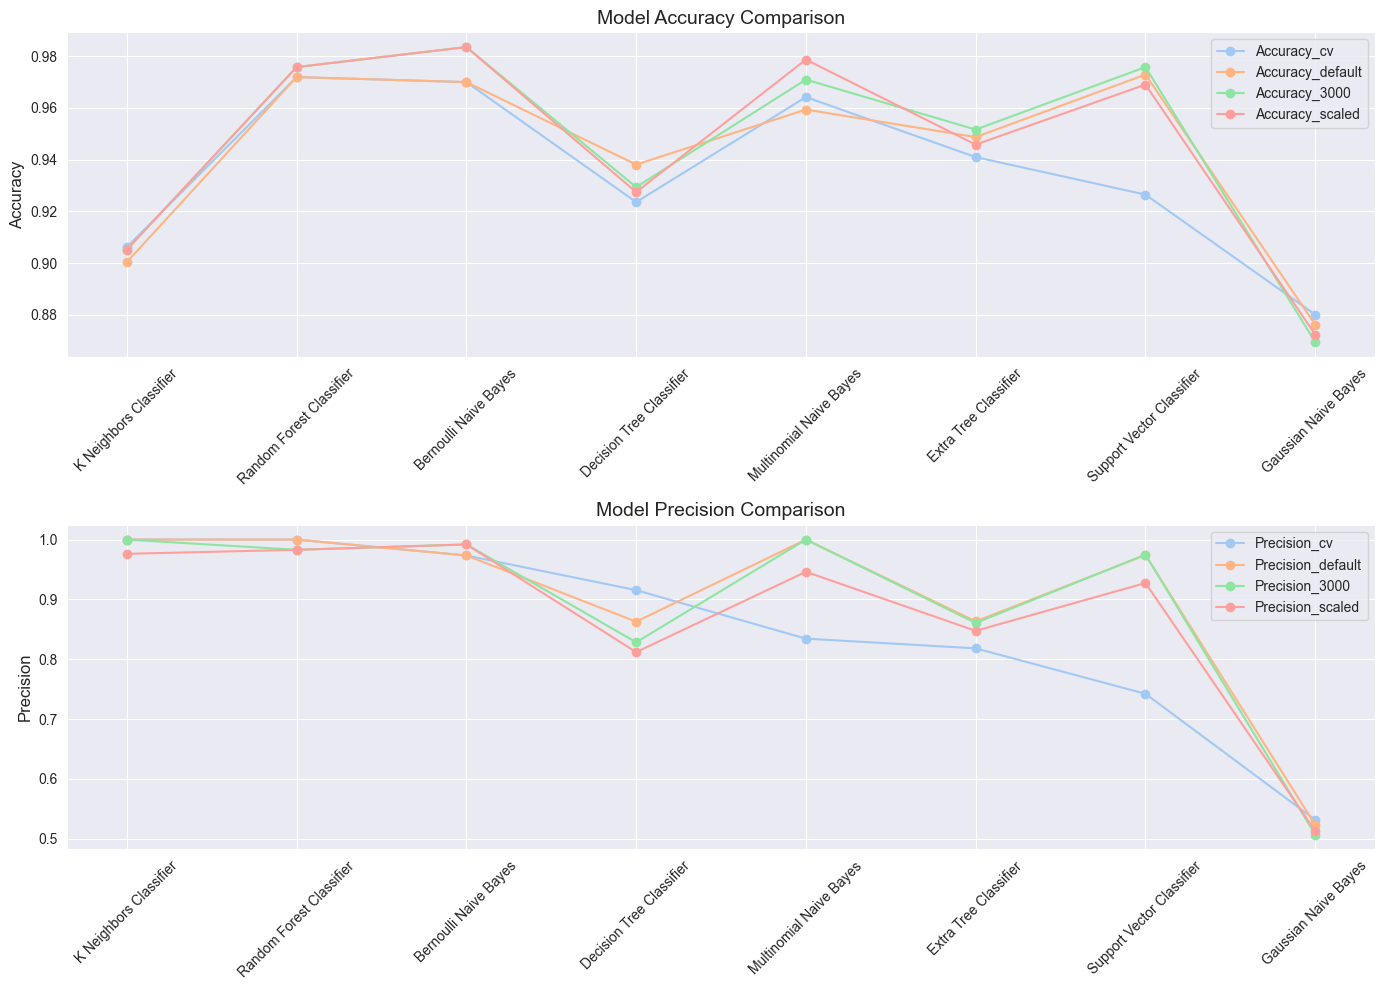

In [66]:
performance_df = pd.DataFrame(performance)

# Plotting performance metrics
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.set_palette('coolwarm')
sns.set_style('darkgrid')

# Accuracy Plot
for col in ["Accuracy_cv", "Accuracy_default", "Accuracy_3000", "Accuracy_scaled"]:
    ax[0].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[0].set_title("Model Accuracy Comparison", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=12)
ax[0].legend()
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)

# Precision Plot
for col in ["Precision_cv", "Precision_default", "Precision_3000", "Precision_scaled"]:
    ax[1].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
ax[1].set_title("Model Precision Comparison", fontsize=14)
ax[1].set_ylabel("Precision", fontsize=12)
ax[1].legend()
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()